**Librerías**

In [104]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## **Revisión de Datos**

In [105]:
path = 'Data/data-even.csv'
data = pd.read_csv(path)

data

Age      Education  EducationNum  ...   Gender CapitalGain HoursPerWeek
0      39      Bachelors            13  ...     Male        2174           40
1      50      Bachelors            13  ...     Male           0           13
2      52        HS-grad             9  ...     Male           0           45
3      30      Bachelors            13  ...     Male           0           40
4      25        HS-grad             9  ...     Male           0           35
...   ...            ...           ...  ...      ...         ...          ...
9860   39     Assoc-acdm            12  ...   Female           0           20
9861   65    Prof-school            15  ...     Male        1086           60
9862   43   Some-college            10  ...   Female           0           40
9863   43   Some-college            10  ...     Male           0           50
9864   52        HS-grad             9  ...   Female       15024           40

[9865 rows x 8 columns]

In [106]:
data.describe()

Age  EducationNum   CapitalGain  HoursPerWeek
count  9865.000000   9865.000000   9865.000000   9865.000000
mean     42.686163     10.543031   1511.164420     40.829397
std      14.539611      2.685759   9209.395181     14.543395
min      17.000000      1.000000      0.000000      1.000000
25%      32.000000      9.000000      0.000000     38.000000
50%      42.000000     10.000000      0.000000     40.000000
75%      53.000000     13.000000      0.000000     48.000000
max      90.000000     16.000000  99999.000000     99.000000

In [107]:
print("El cojunto de datos original tiene {} observaciones y {} variables".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos original tiene 9865 observaciones y 8 variables
Las columnas son: ['Age', 'Education', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


### **Variables**

- **Age**: edad en años.
- **Education**: nivel de educación.
- **Education Num**: años de educación (versión númerica de **Education**).
- **MaritalStatus**: estado marital.
- **Relationship**: rol familiar.
- **Gender**: género.
- **CapitalGain**: ganancias desde la capital.
- **HoursPerWeek**: horas trabajadas por semana. 

Vista de las primeras cinco filas.

In [108]:
data.head()

Age   Education  EducationNum  ... Gender CapitalGain HoursPerWeek
0   39   Bachelors            13  ...   Male        2174           40
1   50   Bachelors            13  ...   Male           0           13
2   52     HS-grad             9  ...   Male           0           45
3   30   Bachelors            13  ...   Male           0           40
4   25     HS-grad             9  ...   Male           0           35

[5 rows x 8 columns]

- **¿Hay filas innecesarias?**

Verificamos si existen filas duplicadas en el conjunto de datos.

In [109]:
duplicados = data[data.duplicated()]
print(f"Número de filas duplicadas: {len(duplicados)}")
#print(duplicados)

Número de filas duplicadas: 2810


Como existen datos duplicados entonces eliminamos esas filas, excepto la primer ocurrencia que encontremos. 

In [110]:
data = data.drop_duplicates(keep='first')

- **Tipo de dato de las columnas**

In [111]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
Education        object
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


La columna de **'Education'** ya tiene una equivalencia numérica en la columna **'EducationNum'**, por lo tanto sería redundante convertir esa columna categórica a una númerica.

In [112]:
data.drop(data.columns[[1,4]], inplace=True, axis=1)
print("El cojunto de datos ahora tiene {} observaciones y {} columnas".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos ahora tiene 7055 observaciones y 6 columnas
Las columnas son: ['Age', 'EducationNum', 'MaritalStatus', 'Gender', 'CapitalGain', 'HoursPerWeek']


C:\Users\paola\AppData\Local\Temp\ipykernel_21724\3562100021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.columns[[1,4]], inplace=True, axis=1)


- **¿Hay valores vacíos en la hoja de datos?**

In [113]:
print("Valores faltantes en cada columna:\n{}".format(data.isnull().sum()))

Valores faltantes en cada columna:
Age              0
EducationNum     0
MaritalStatus    0
Gender           0
CapitalGain      0
HoursPerWeek     0
dtype: int64


Notamos que no hay variables faltantes en el conjunto de datos, lo cual es excelente ya que no necesitamos modificarlo.

- **Tipo de datos por columna**

In [114]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
EducationNum      int64
MaritalStatus    object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


Existen:
- 4 variables númericas (todas con valores enteros)
- 3 variables categóricas.

### **Análisis de Variables Categóricas**

In [115]:
print("Valores de cada columna categórica:")
for columna in data.select_dtypes(include=[object]):
    print(columna, ":", data[columna].unique())

Valores de cada columna categórica:
MaritalStatus : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
Gender : [' Male' ' Female']


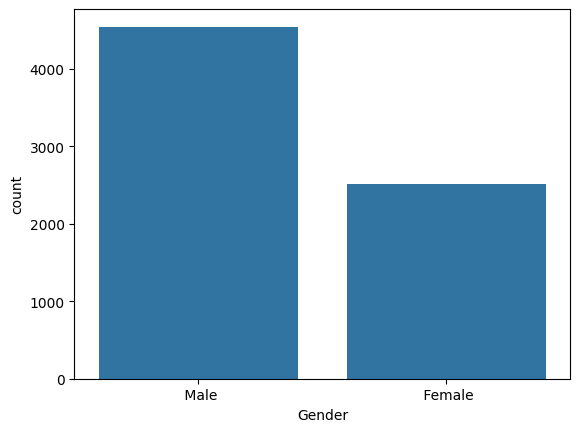

In [116]:
sns.countplot(data=data, x='Gender')
plt.show()

In [269]:
#sns.countplot(data=data, x='Relationship')
#plt.title('Relationship')
#plt.show()

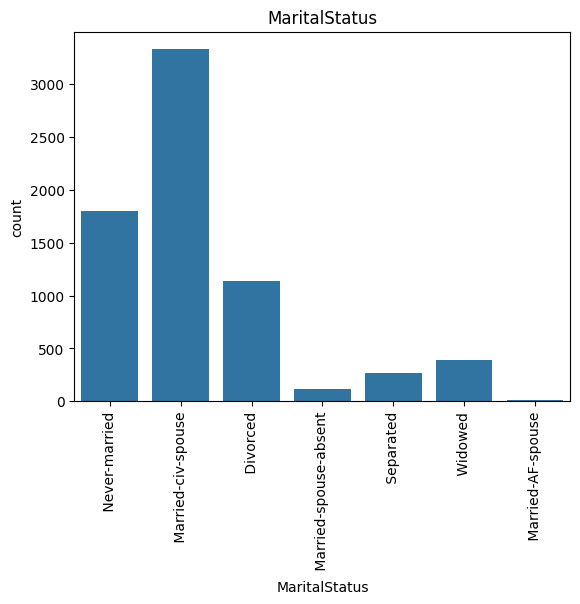

In [117]:
sns.countplot(data = data, x = 'MaritalStatus')
plt.title('MaritalStatus')
plt.xticks(rotation = 90)
plt.show()

Podemos observar que las variables **MaritalStatus** y **Relationship** se relacionan. Uno muestra el estado civil de la persona, ya sea casado, soltero, divorciado, etc. 

Para **MaritalStatus** y **Relationship** notamos que tienen varios estados, pero no hay un orden natural visible entre ellos. Por eso mismo, se decidió utilizar OneHotEncoder.

Sin embargo, **Gender** es fácilmente clasificable entre fememino y masculino.

## **Preprocesamiento**

Convertir variables categóricas a númericas. 

- MaritalStatus
- Relationship
- Gender

In [118]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = ['Age', 'EducationNum', 'HoursPerWeek']
num_col_outlier = ['CapitalGain']
cat_cols = ['MaritalStatus', 'Gender']


num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one')), 
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop = 'first')),
])

ct = ColumnTransformer(
    [
        ('log', log_pipeline, num_col_outlier),
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

cluster1_data = ct.fit_transform(data)

cluster1_df = pd.DataFrame(
    cluster1_data,
    columns=ct.get_feature_names_out()
)

cluster1_df

log__CapitalGain  ...  cat__Gender_ Male
0             2.108768  ...                1.0
1            -0.391832  ...                1.0
2            -0.391832  ...                1.0
3            -0.391832  ...                1.0
4            -0.391832  ...                1.0
...                ...  ...                ...
7050         -0.391832  ...                0.0
7051         -0.391832  ...                0.0
7052          1.883070  ...                1.0
7053         -0.391832  ...                0.0
7054          2.737656  ...                0.0

[7055 rows x 11 columns]

In [119]:
print("Dimensiones:", cluster1_df.shape)
print("Varianza media por columna:", cluster1_df.var().mean())


Dimensiones: (7055, 11)
Varianza media por columna: 0.4341890178441943


In [120]:
cluster1_df.mean()

log__CapitalGain                            -5.406432e-15
num__Age                                    -1.858030e-16
num__EducationNum                           -5.926435e-17
num__HoursPerWeek                            3.015090e-16
cat__MaritalStatus_ Married-AF-spouse        1.133948e-03
cat__MaritalStatus_ Married-civ-spouse       4.721474e-01
cat__MaritalStatus_ Married-spouse-absent    1.644224e-02
cat__MaritalStatus_ Never-married            2.557052e-01
cat__MaritalStatus_ Separated                3.798724e-02
cat__MaritalStatus_ Widowed                  5.584692e-02
cat__Gender_ Male                            6.439405e-01
dtype: float64

## **K-Means**

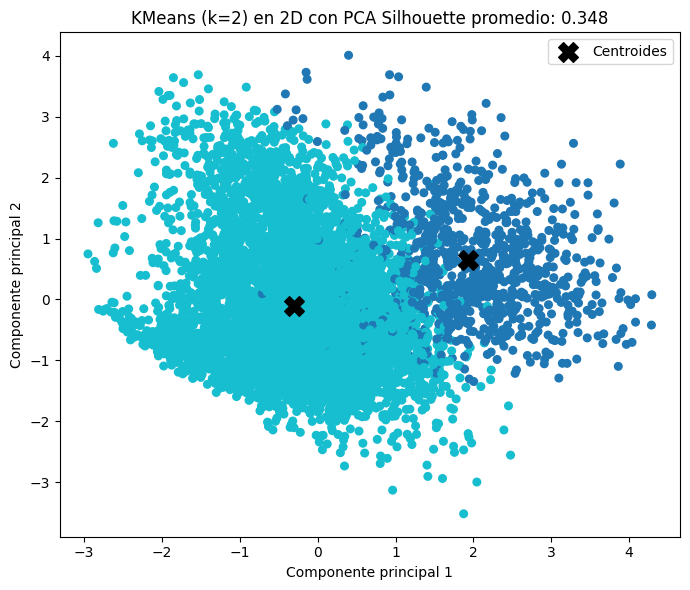

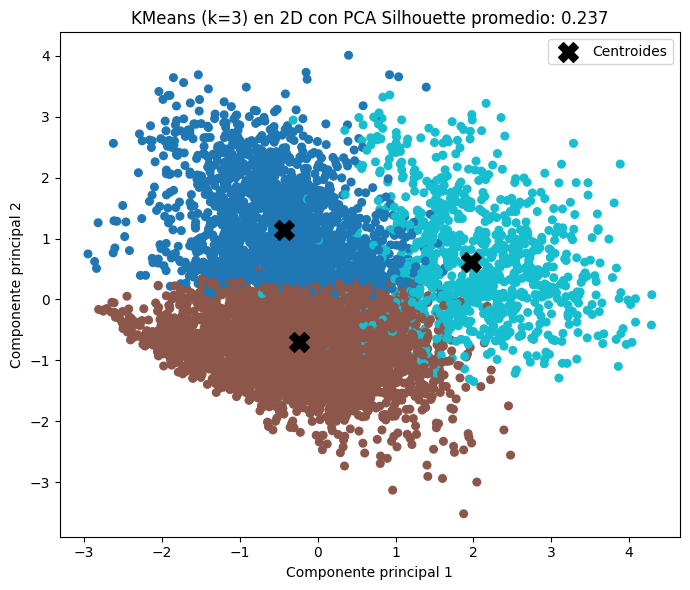

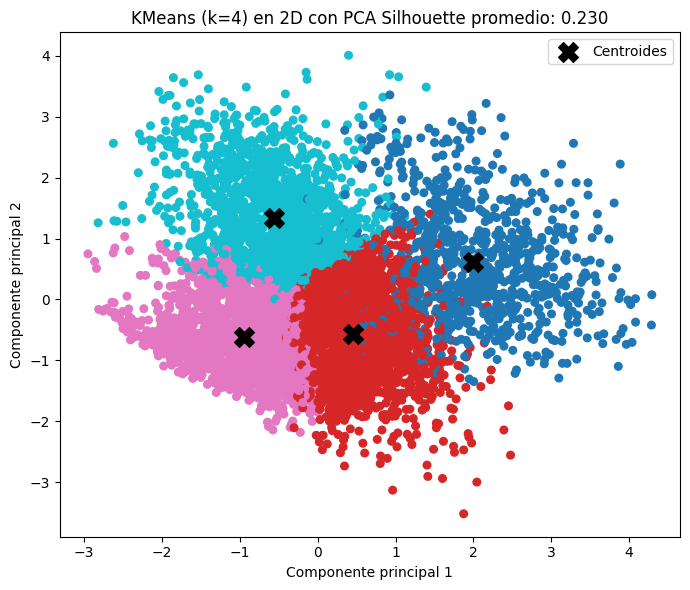

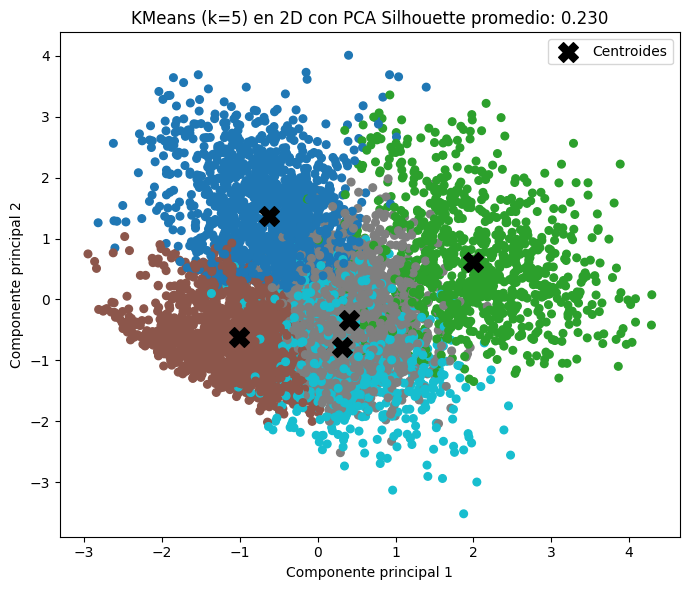

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

ks = range(2, 6)
silhouette_avgs = [] 
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=40)
    labels = kmeans.fit_predict(cluster1_data)

    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(cluster1_data, labels)
    else:
        silhouette_avg = np.nan
    
    silhouette_avgs.append(silhouette_avg) 

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(cluster1_data)

    centroids_pca = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                marker='X', s=200, c='black', label='Centroides')

    # Título con el valor del silhouette
    plt.title(f"KMeans (k={k}) en 2D con PCA Silhouette promedio: {silhouette_avg:.3f}")
    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.legend()
    plt.tight_layout()
    plt.show()


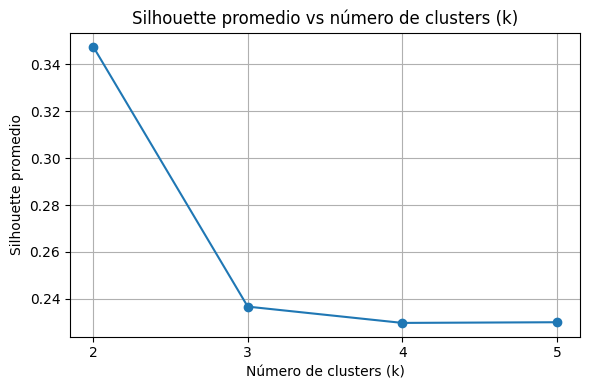

In [275]:
plt.figure(figsize=(6, 4))
plt.plot(list(ks), silhouette_avgs, marker='o')
plt.title('Silhouette promedio vs número de clusters (k)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette promedio')
plt.xticks(list(ks))
plt.grid(True)
plt.tight_layout()
plt.show()

**Prueba del Codo**

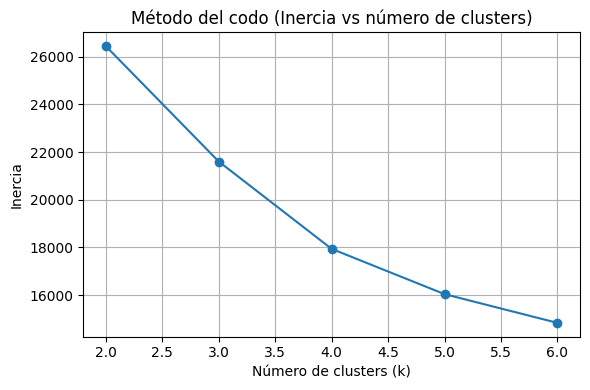

In [276]:
clusters_range = range(2, 7)
inertias = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=20, random_state=12).fit(cluster1_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Método del codo (Inercia vs número de clusters)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()

KMeans (k=4) - Silhouette promedio: 0.230


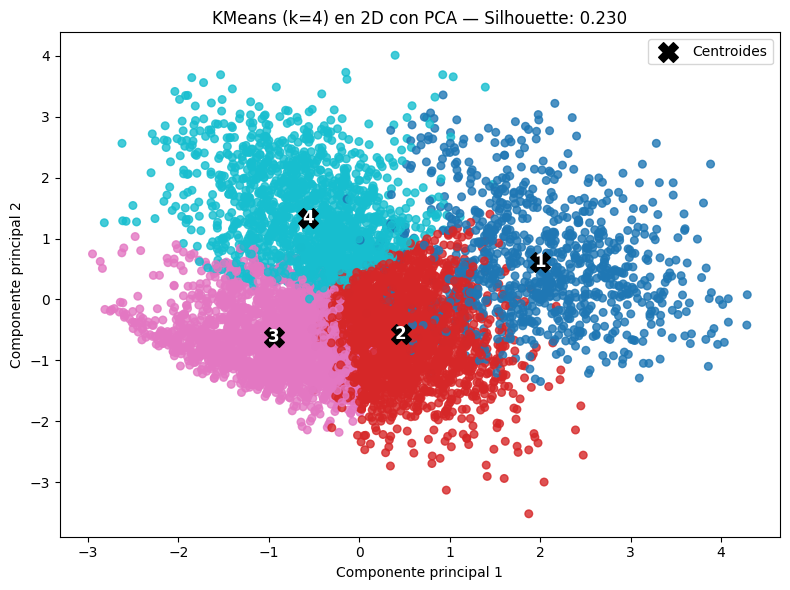

In [277]:

k = 4
kmeans = KMeans(n_clusters=k, random_state=12, n_init=40)
labels = kmeans.fit_predict(cluster1_data)

labels_1based = labels + 1

# Silhouette
if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(cluster1_data, labels)
else:
    silhouette_avg = np.nan

print(f"KMeans (k={k}) - Silhouette promedio: {silhouette_avg:.3f}")

# PCA 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels, cmap='tab10', s=30, alpha=0.8)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=200, c='black', label='Centroides')
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, str(i+1), fontsize=12, fontweight='bold',
             color='white', ha='center', va='center')

plt.title(f"KMeans (k={k}) en 2D con PCA — Silhouette: {silhouette_avg:.3f}")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.tight_layout()
plt.show()

## **Hierarchical Clustering**

### 1. Single Linkage

In [144]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

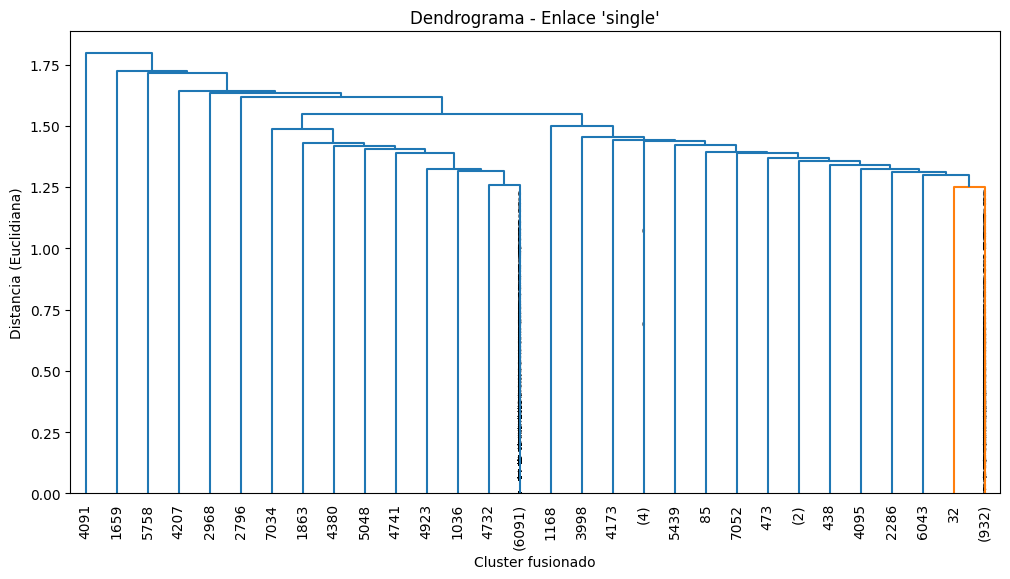

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z_single = linkage(cluster1_data, method='single', metric='euclidean')

plt.figure(figsize=(12, 6))
dendrogram(Z_single, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Enlace 'single'")
plt.xlabel("Cluster fusionado")
plt.ylabel("Distancia (Euclidiana)")
plt.show()

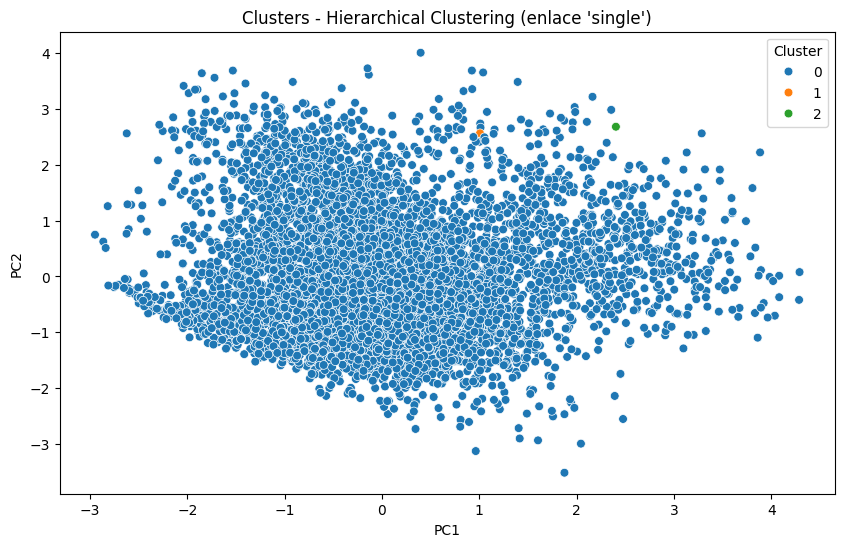

In [150]:
X = cluster1_data
model = AgglomerativeClustering(
    n_clusters=3,          
    linkage='single'
).fit(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=model.labels_, palette='tab10', s=40)
plt.title("Clusters - Hierarchical Clustering (enlace 'single')")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()


### 2. Complete

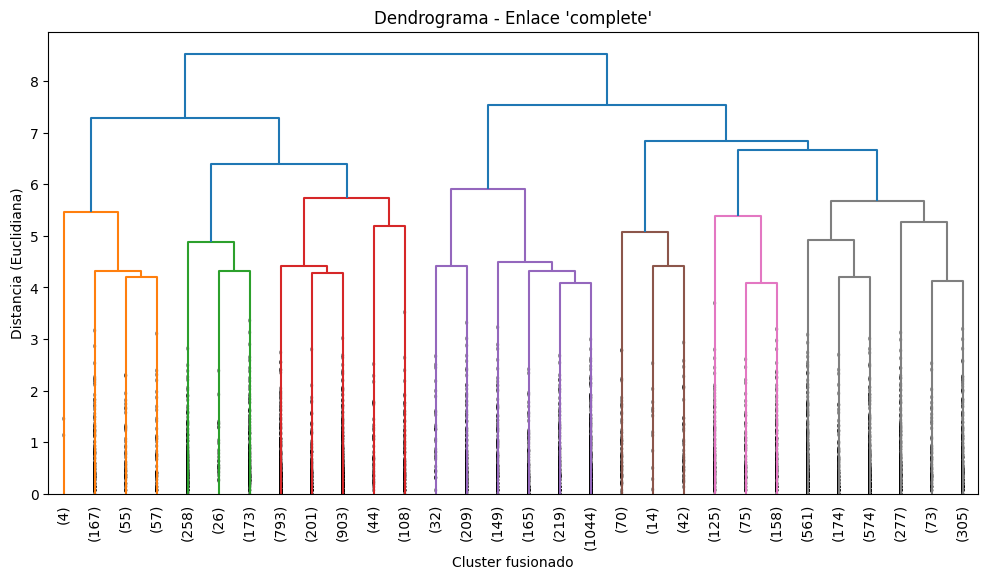

In [153]:
Z_complete = linkage(cluster1_data, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(Z_complete, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Enlace 'complete'")
plt.xlabel("Cluster fusionado")
plt.ylabel("Distancia (Euclidiana)")
plt.show()

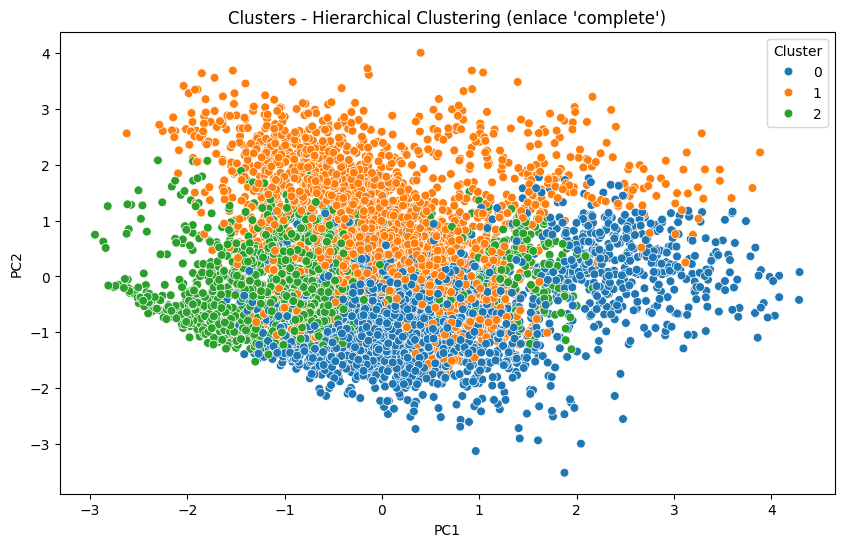

In [163]:
X = cluster1_data
model = AgglomerativeClustering(
    n_clusters=3,          
    linkage='complete'
).fit(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=model.labels_, palette='tab10', s=40)
plt.title("Clusters - Hierarchical Clustering (enlace 'complete')")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()


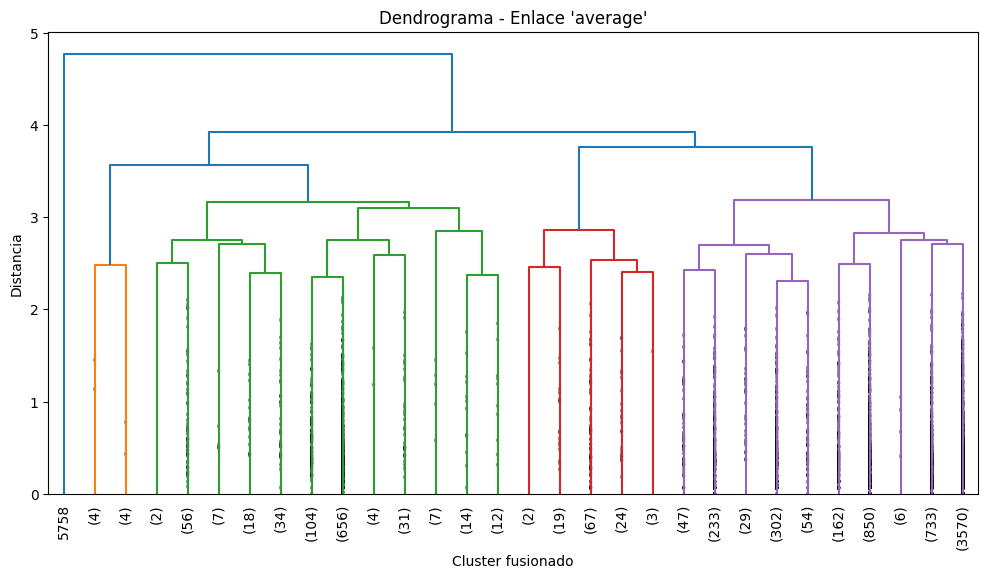

In [164]:
Z_average = linkage(cluster1_data, method='average')

plt.figure(figsize=(12, 6))
dendrogram(Z_average, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Enlace 'average'")
plt.xlabel("Cluster fusionado")
plt.ylabel("Distancia")
plt.show()

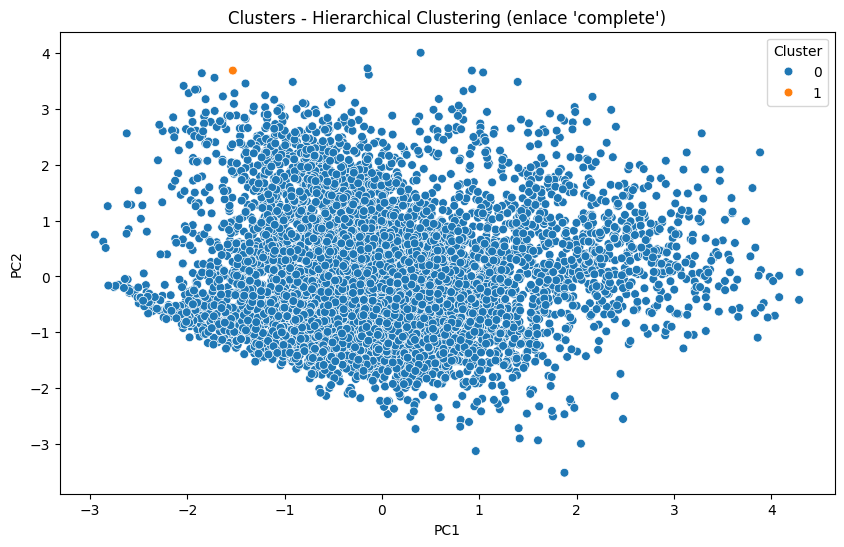

In [167]:
X = cluster1_data
model = AgglomerativeClustering(
    n_clusters=2,          
    linkage='average'
).fit(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=model.labels_, palette='tab10', s=40)
plt.title("Clusters - Hierarchical Clustering (enlace 'complete')")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()


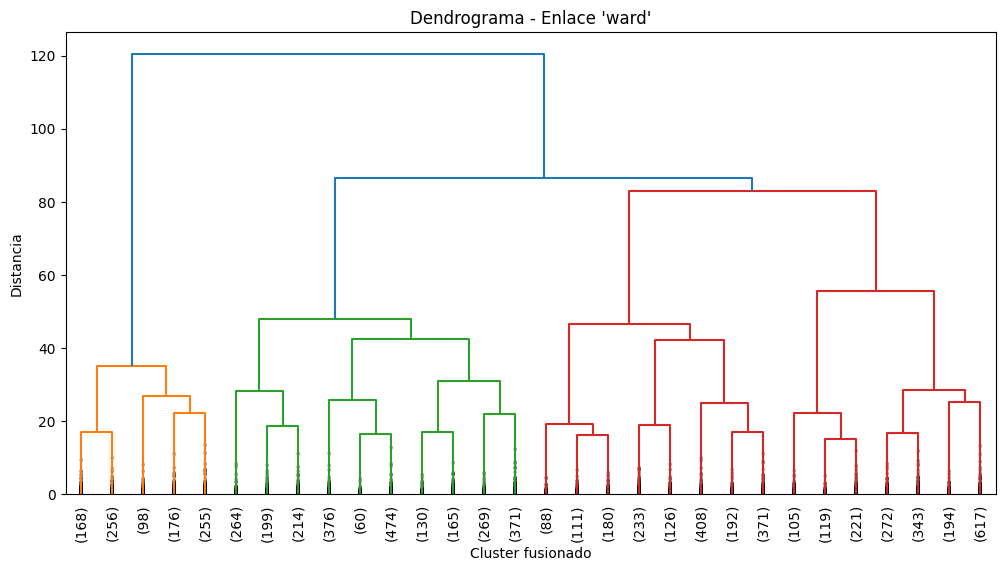

In [168]:
Z_ward = linkage(cluster1_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z_ward, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Enlace 'ward'")
plt.xlabel("Cluster fusionado")
plt.ylabel("Distancia")
plt.show()

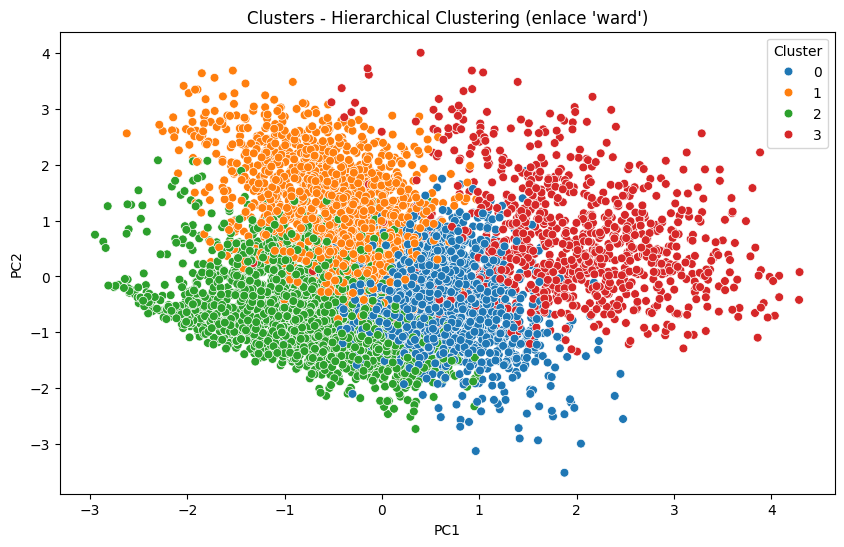

In [174]:
X = cluster1_data
model = AgglomerativeClustering(
    n_clusters=4,          
    linkage='ward'
).fit(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=model.labels_, palette='tab10', s=40)
plt.title("Clusters - Hierarchical Clustering (enlace 'ward')")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

## **DBSCAN**

eps=0.30 -> clusters=152


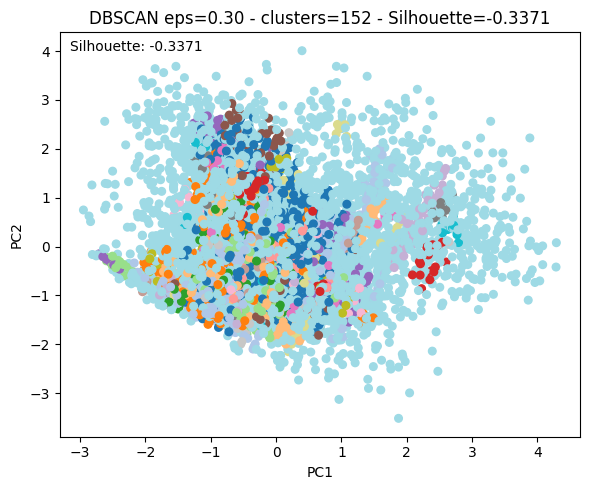

eps=0.40 -> clusters=53


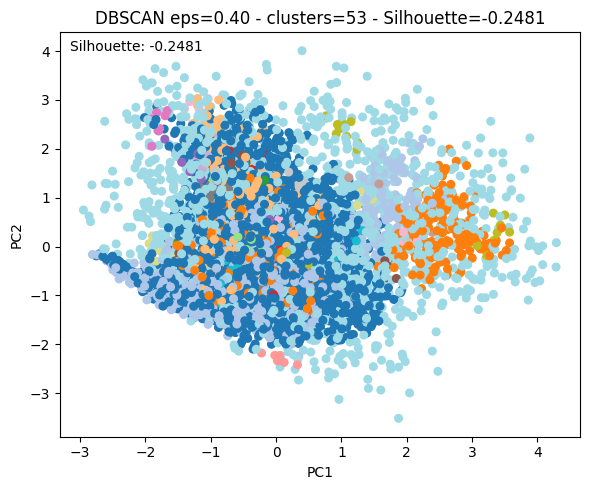

eps=0.50 -> clusters=40


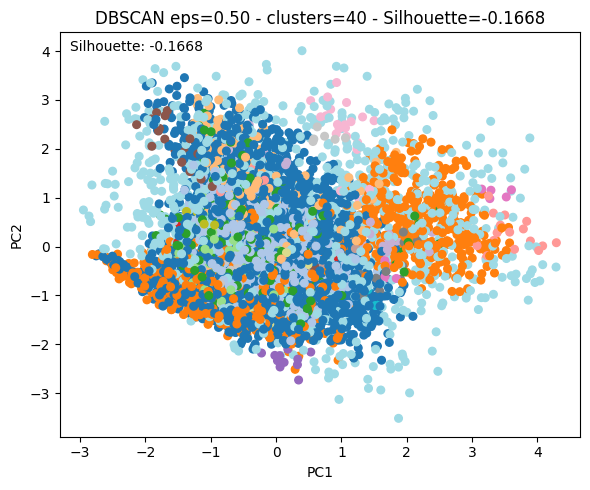

eps=0.60 -> clusters=37


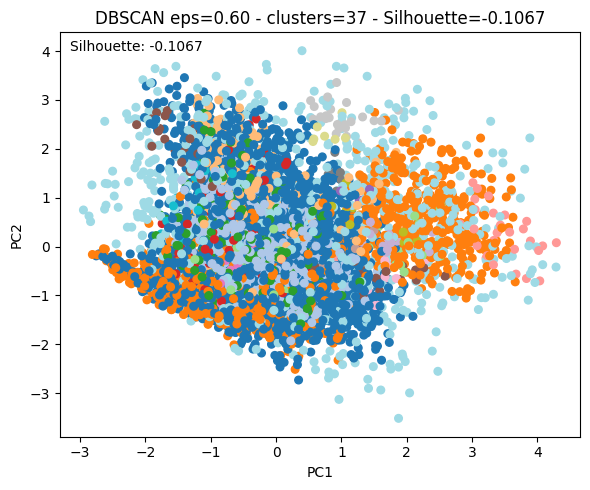

eps=0.70 -> clusters=26


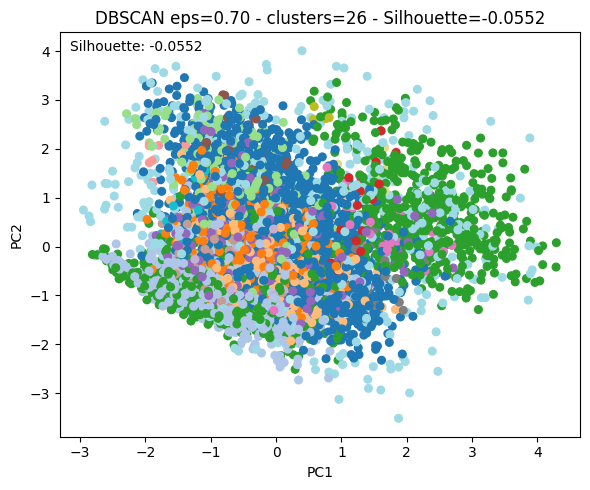

eps=0.80 -> clusters=25


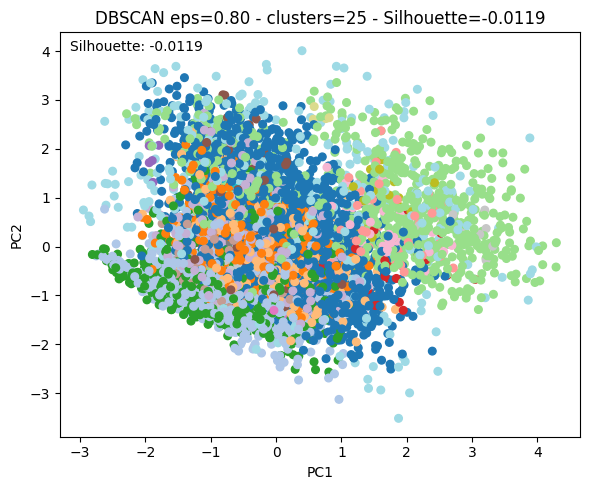

eps=0.90 -> clusters=24


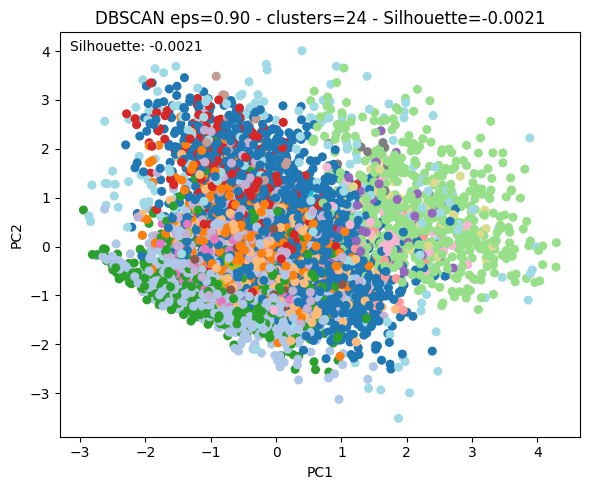

eps=1.00 -> clusters=8


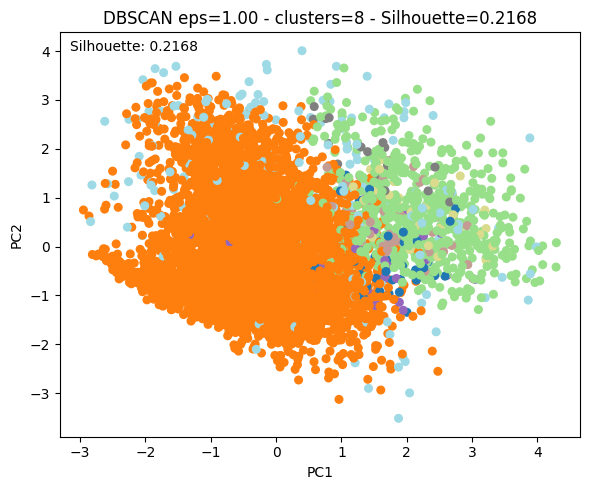

eps=1.10 -> clusters=4


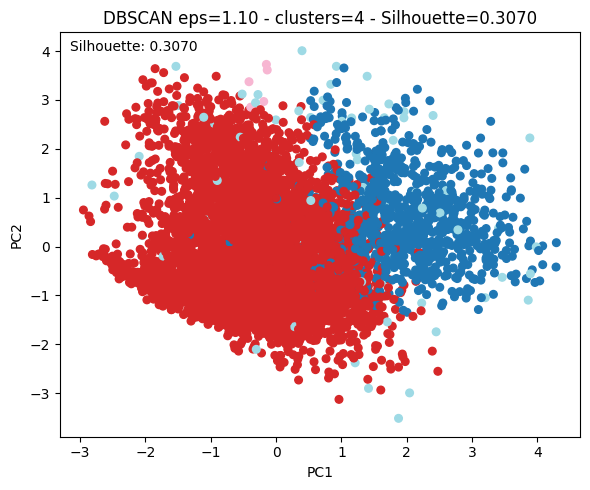

eps=1.20 -> clusters=4


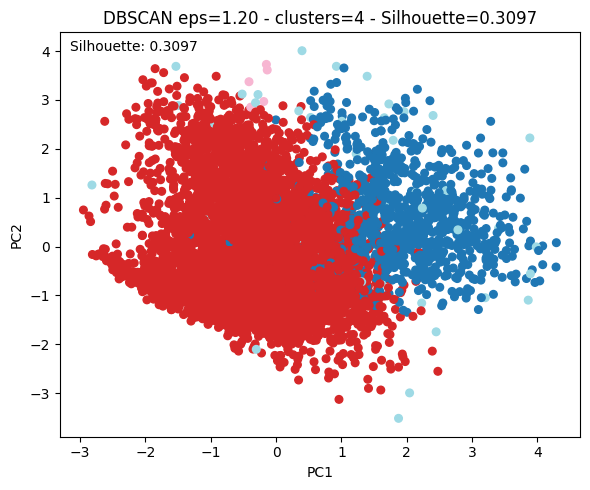

eps=1.30 -> clusters=3


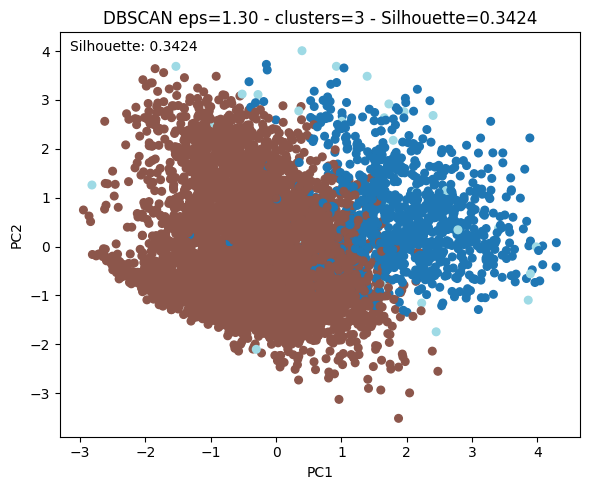

eps=1.40 -> clusters=3


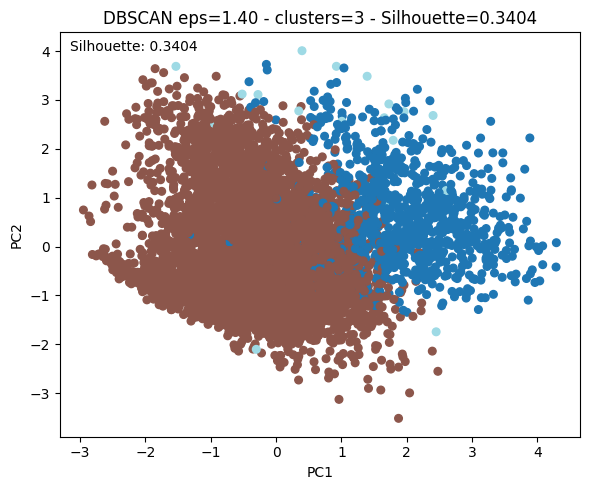

In [122]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

eps_values = np.arange(0.3, 1.5, 0.1)

min_samples = 5  

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)

silhouette_avgs = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(cluster1_data) 

    max_label = labels.max()

    new_label_for_noise = max_label + 1 if max_label != -1 else 0
    labels_no_noise_flag = labels.copy()
    labels_no_noise_flag[labels == -1] = new_label_for_noise

    n_clusters = len(set(labels_no_noise_flag))
    print(f"eps={eps:.2f} -> clusters={n_clusters}")

   
    if len(set(labels_no_noise_flag)) > 1:
        sil = silhouette_score(cluster1_data, labels_no_noise_flag)
        sil_print = f"{sil:.4f}"
    silhouette_avgs.append(sil)

    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_no_noise_flag, cmap='tab20', s=30)
    plt.title(f"DBSCAN eps={eps:.2f} - clusters={n_clusters} - Silhouette={sil_print}")
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.gca().text(0.02, 0.98, f"Silhouette: {sil_print}", transform=plt.gca().transAxes,
                   verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.tight_layout()
    plt.show()



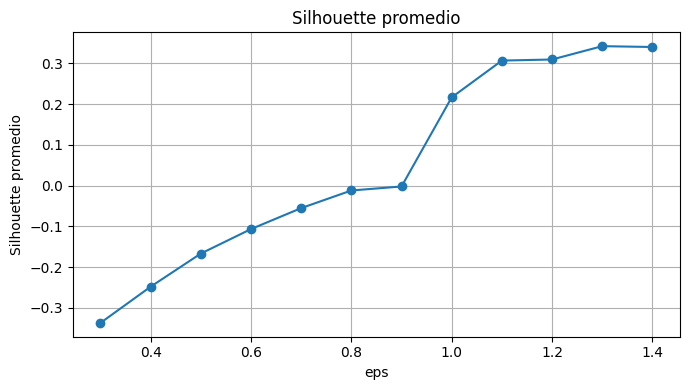

In [123]:
plt.figure(figsize=(7,4))
plt.plot(eps_values, silhouette_avgs, marker='o')
plt.title('Silhouette promedio')
plt.xlabel('eps')
plt.ylabel('Silhouette promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

Observamos que al momento de aumentar el valor de la variable `eps`, el número de clusters disminuye. En el rango de 1.1 - 1.4 el número de clusters es reducido a 3 o 4.

Mientras que el coeficiente de Silhouette mejora progresivamente, el valor máximo que alcanza es de 0.34.

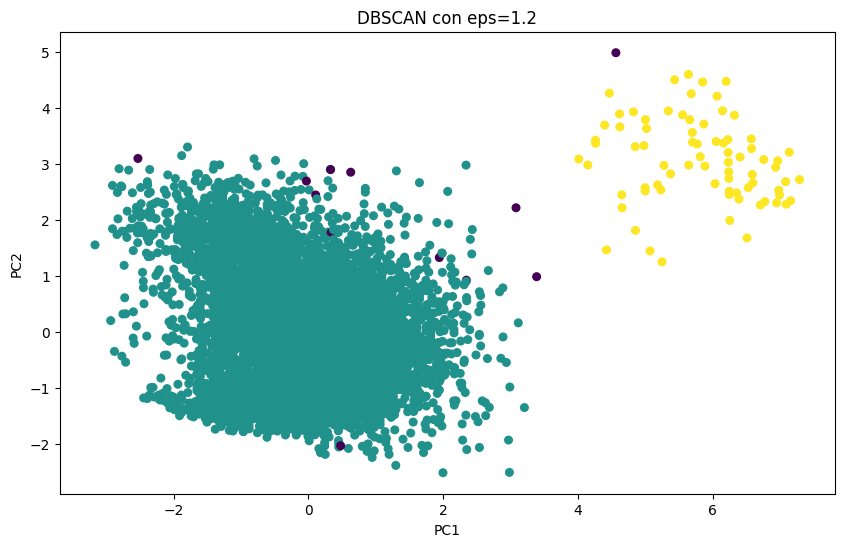

In [124]:
dbscan_final = DBSCAN(eps=1.5, min_samples=4)
labels_final = dbscan_final.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_final, cmap='viridis', s=30)
plt.title("DBSCAN con eps=1.2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## **Gaussian Mixture Models**

In [125]:
from sklearn.mixture import GaussianMixture

X = cluster1_data
cov_types = ['full', 'tied', 'diag', 'spherical']
n_components = np.arange(1, 11)
colors = ['tab:purple', 'tab:red', 'tab:green', 'tab:brown']
results = []

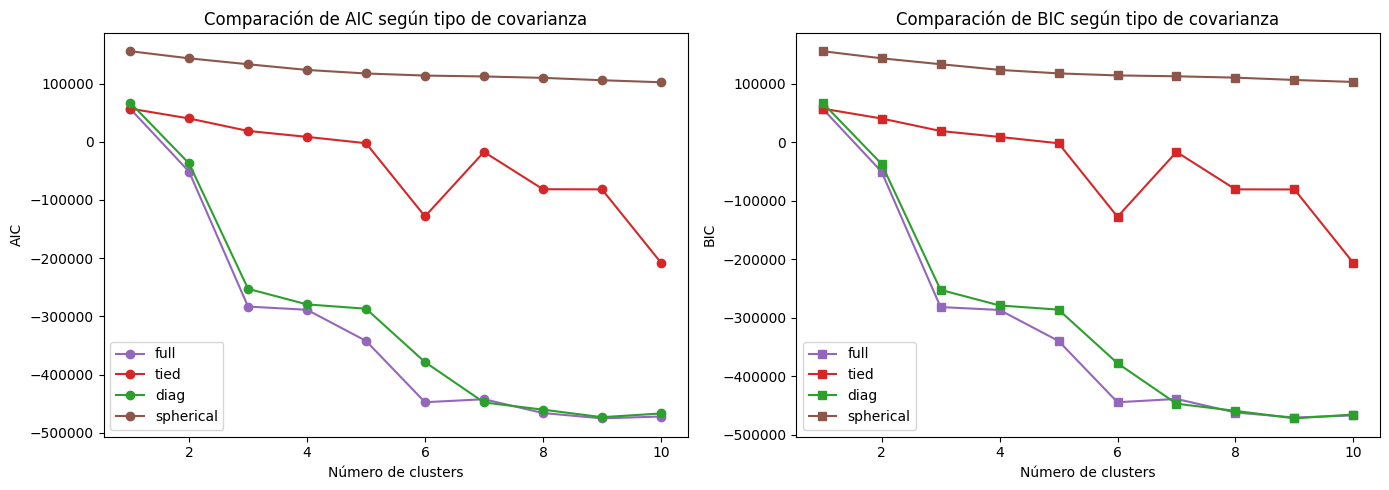

In [291]:
for cov in cov_types:
    aic = []
    bic = []
    for k in n_components:
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        bic.append(gmm.bic(X))
    results.append({'cov_type': cov, 'AIC': aic, 'BIC': bic})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for cov, color in zip(cov_types, colors):
    res = next(r for r in results if r['cov_type'] == cov)
    axes[0].plot(n_components, res['AIC'], marker='o', color=color, label=cov)
    
axes[0].set_title('Comparación de AIC según tipo de covarianza')
axes[0].set_xlabel('Número de clusters')
axes[0].set_ylabel('AIC')
axes[0].legend()

for cov, color in zip(cov_types, colors):
    res = next(r for r in results if r['cov_type'] == cov)
    axes[1].plot(n_components, res['BIC'], marker='s', color=color, label=cov)
    
axes[1].set_title('Comparación de BIC según tipo de covarianza')
axes[1].set_xlabel('Número de clusters')
axes[1].set_ylabel('BIC')
axes[1].legend()

plt.tight_layout()
plt.show()

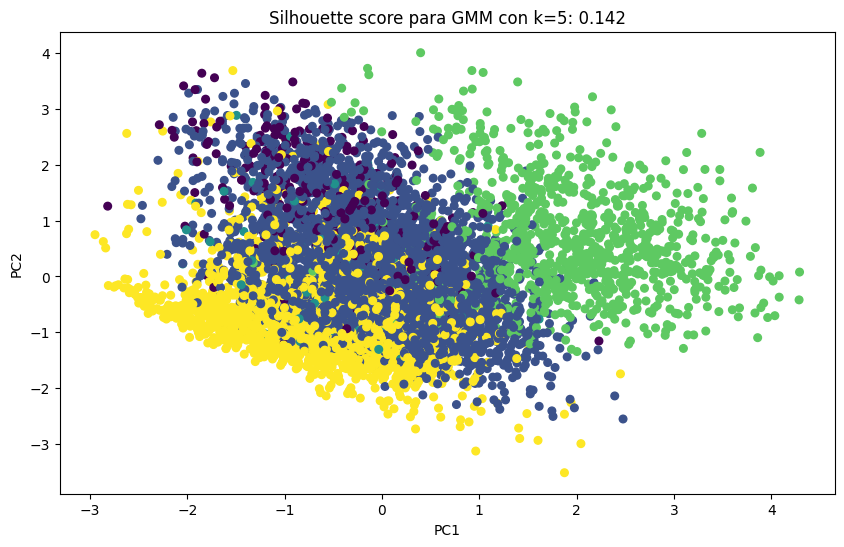

In [138]:
k_gmm = 5
gmm = GaussianMixture(n_components=k_gmm, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='viridis', s=30)
silhouette_avg = silhouette_score(X, labels_gmm)
plt.title(f"Silhouette score para GMM con k={k_gmm}: {silhouette_avg:.3f}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

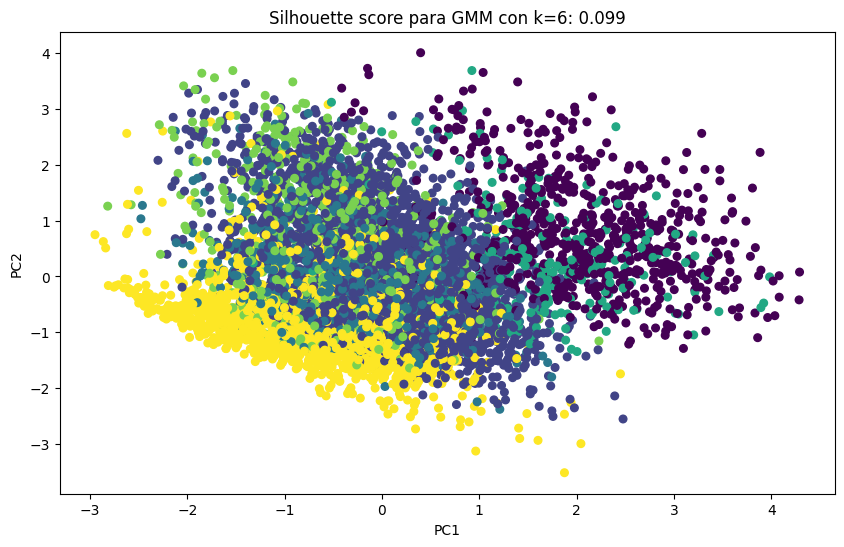

In [137]:
k_gmm = 6
gmm = GaussianMixture(n_components=k_gmm, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='viridis', s=30)
silhouette_avg = silhouette_score(X, labels_gmm)
plt.title(f"Silhouette score para GMM con k={k_gmm}: {silhouette_avg:.3f}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


k=2 -> AIC=-51335.27, BIC=-50271.73, Silhouette=0.278
k=3 -> AIC=-283065.66, BIC=-281466.93, Silhouette=0.164
k=4 -> AIC=-288554.54, BIC=-286420.62, Silhouette=0.096
k=5 -> AIC=-342023.65, BIC=-339354.53, Silhouette=0.142
k=6 -> AIC=-447279.68, BIC=-444075.36, Silhouette=0.099
k=7 -> AIC=-442160.88, BIC=-438421.37, Silhouette=0.081
k=8 -> AIC=-465862.85, BIC=-461588.14, Silhouette=0.053
k=9 -> AIC=-475017.12, BIC=-470207.21, Silhouette=0.093
k=10 -> AIC=-471843.90, BIC=-466498.80, Silhouette=0.049


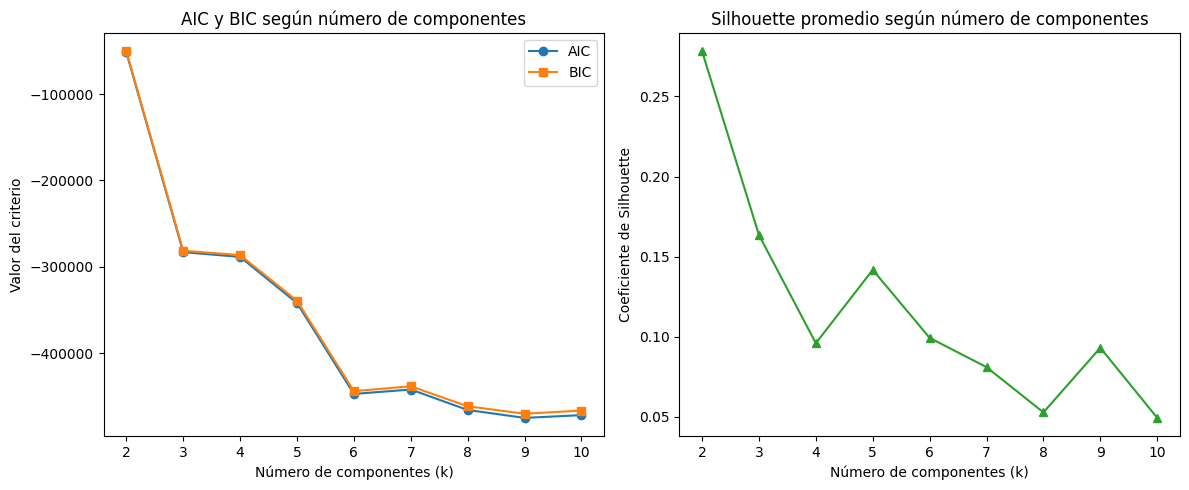

In [ ]:
X = cluster1_data
n_components = np.arange(2, 11)
aic_values = []
bic_values = []
silhouette_values = []

for k in n_components:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(X)
    
    # Cálculo de AIC y BIC
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))
    
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(X, labels)
    else:
        silhouette_avg = np.nan
    silhouette_values.append(silhouette_avg)

for i, k in enumerate(n_components):
    print(f"k={k} -> AIC={aic_values[i]:.2f}, BIC={bic_values[i]:.2f}, Silhouette={silhouette_values[i]:.3f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components, aic_values, marker='o', label='AIC')
plt.plot(n_components, bic_values, marker='s', label='BIC')
plt.xlabel("Número de componentes (k)")
plt.ylabel("Valor del criterio")
plt.title("AIC y BIC según número de componentes")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_components, silhouette_values, marker='^', color='tab:green')
plt.xlabel("Número de componentes (k)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Silhouette promedio según número de componentes")

plt.tight_layout()
plt.show()


Aunque el modelo **GMM** con 5 componentes fue el que presentó el mejor ajuste según los criterios **AIC** y **BIC**, la visualización bidimensional mediante PCA no muestra fronteras claramente definidas entre los grupos.

Esto se debe a que el modelo se ajusta en un espacio de alta dimensión, donde los clusters pueden solaparse parcialmente y diferenciarse por combinaciones de variables que no se reflejan en las dos primeras componentes principales.

**Metodo Seleccionado**

C:\Users\OMEN\AppData\Local\Temp\ipykernel_11840\774906695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels_1based


KMeans (k=4) - Silhouette promedio: 0.230


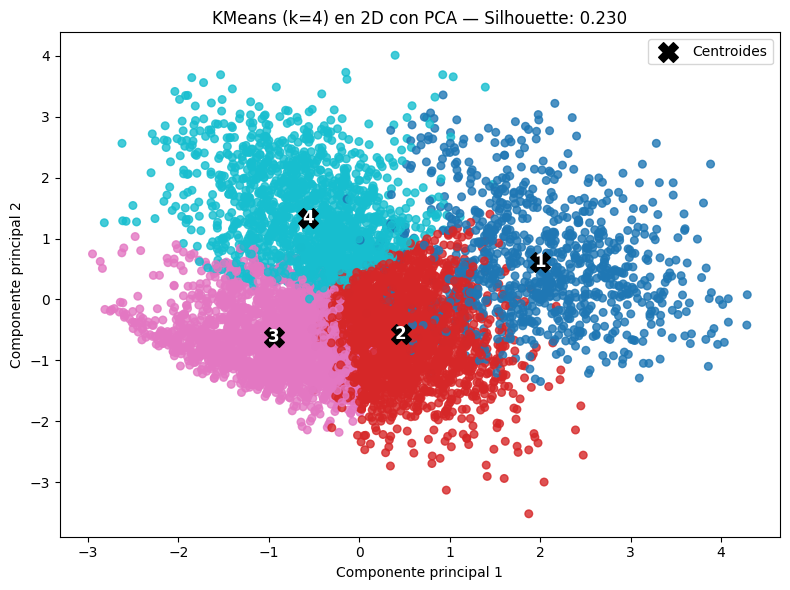

Variables numéricas a analizar: ['Age', 'EducationNum', 'CapitalGain', 'HoursPerWeek']


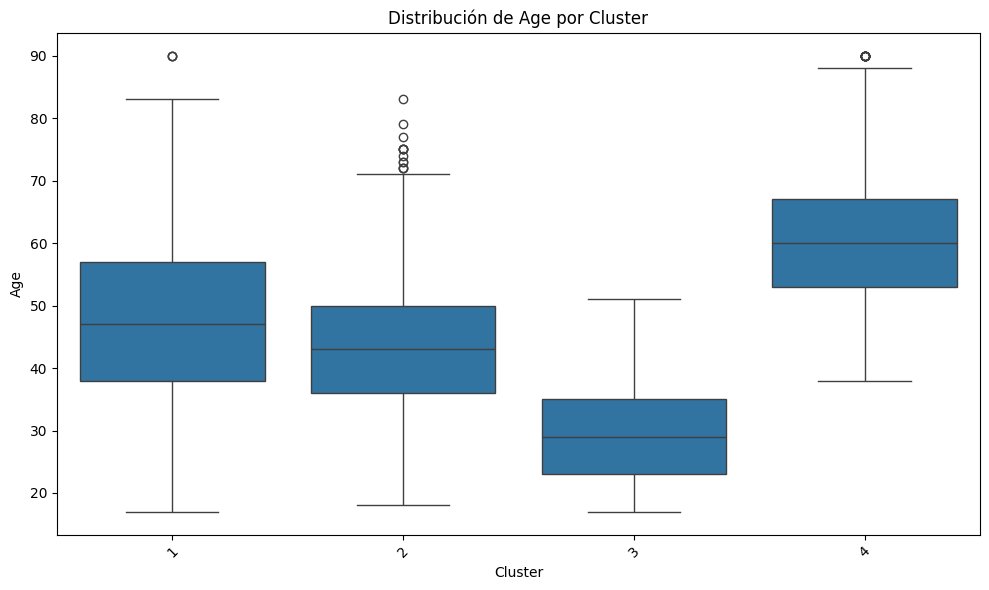

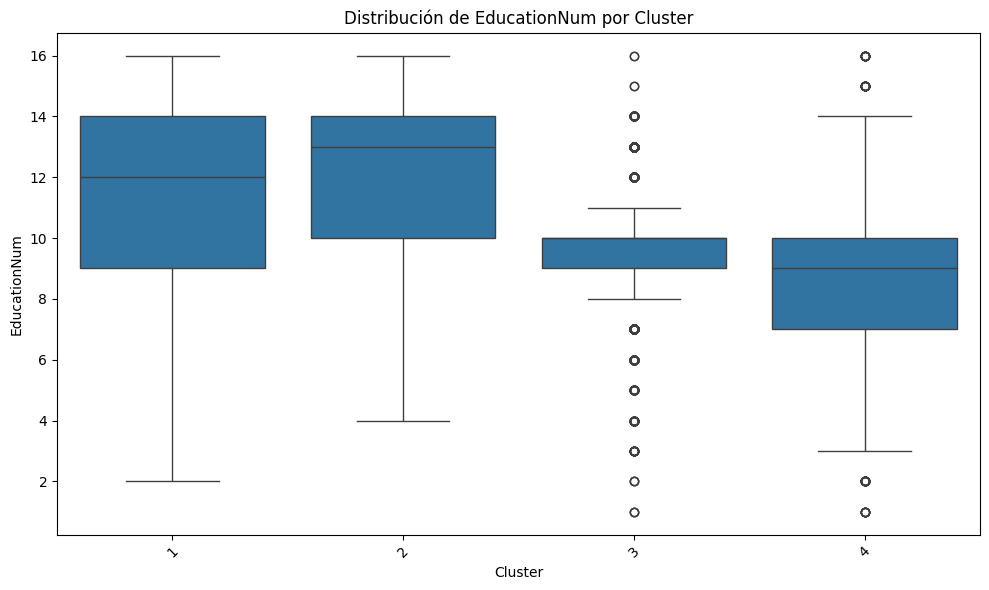

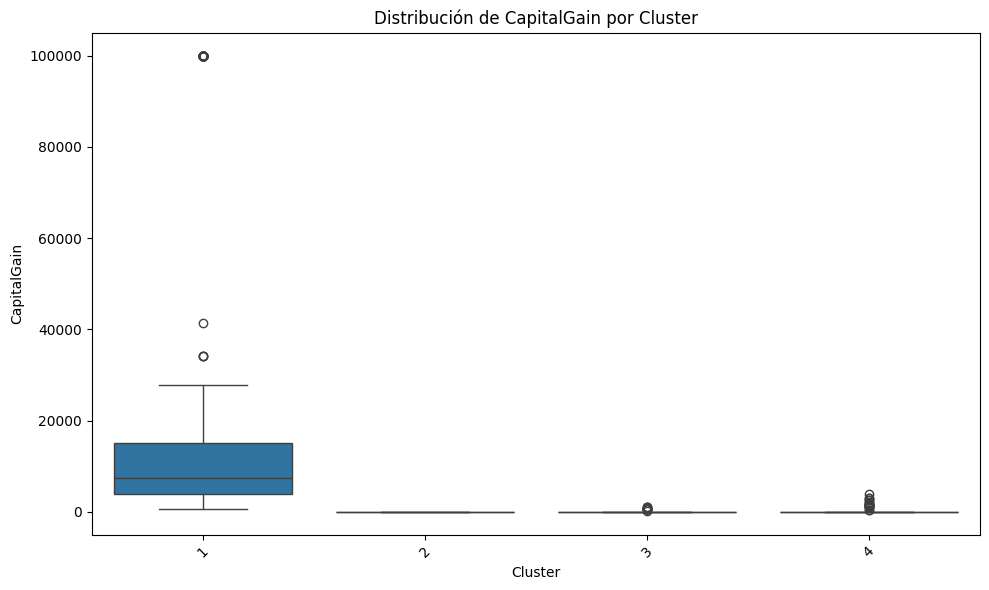

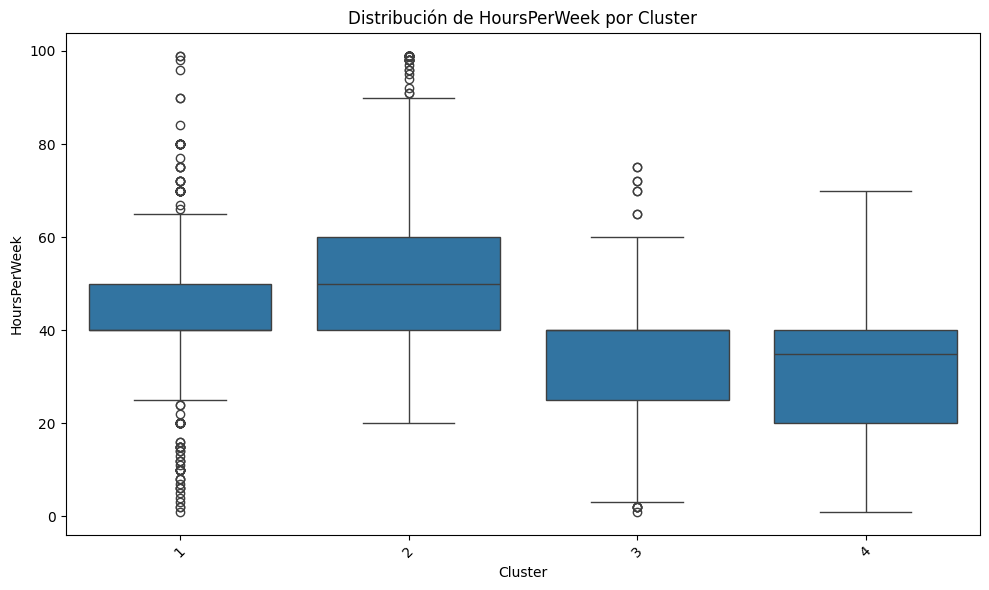

In [293]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=12, n_init=40)
labels = kmeans.fit_predict(cluster1_data)

labels_1based = labels + 1

data['Cluster'] = labels_1based


if len(set(labels)) > 1:
    silhouette_avg = silhouette_score(cluster1_data, labels)

print(f"KMeans (k={k}) - Silhouette promedio: {silhouette_avg:.3f}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels, cmap='tab10', s=30, alpha=0.8)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=200, c='black', label='Centroides')
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, str(i+1), fontsize=12, fontweight='bold',
             color='white', ha='center', va='center')

plt.title(f"KMeans (k={k}) en 2D con PCA — Silhouette: {silhouette_avg:.3f}")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.tight_layout()
plt.show()


numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

if 'Cluster' in numerical_cols:
    numerical_cols.remove('Cluster')

print(f"Variables numéricas a analizar: {numerical_cols}")

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'Distribución de {col} por Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()